<a href="https://colab.research.google.com/github/samaun37/suicidalTextDetectionInBangla/blob/main/suicidalTextInBangla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving suic_last.csv to suic_last.csv


In [ ]:
uploaded = files.upload()

Saving suic_t1.csv to suic_t1.csv


In [ ]:
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install neattext
import neattext.functions as nfx
import matplotlib.pyplot as plt
import plotly.express as plx
from sklearn.metrics import classification_report
import keras
from keras.layers import Embedding,Dense,LSTM,Bidirectional,GlobalMaxPooling1D,Input,Dropout
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.models import Sequential
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from tqdm import tqdm
import seaborn as sns
import pickle
import io
df = pd.read_csv('suic_last.csv',names=['text', 'label'])

In [ ]:
df = df.dropna(subset = ['text'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


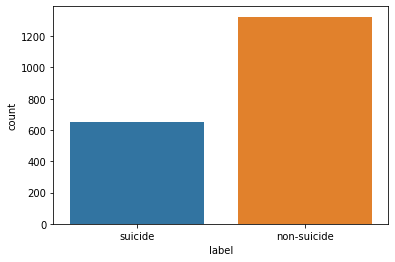

In [ ]:
import seaborn as sn
sn.countplot(df['label'])
plt.show()

In [ ]:
df2 = pd.read_csv('suic_t1.csv')

In [ ]:
df2

,আমি মরতে চাই এই দুনিয়াতে আর থাকতে চাই না জীবনে কষ্ট ছাড়া কিছু পেলাম না


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
sad = ['কাদঁতেছি','কান্না','কাঁদব','কাঁদা','কাঁদবো','কাদতেছিলাম','কেঁদেছি','কানার','কাঁদার','কাদছি',
       'কষ্ট','কষ্টে','কষ্টের','দুঃখ','কষ্টটা','কষ্টতে','যন্ত্রণা','যন্ত্রনায়', 'যন্ত্রণার', 'যন্ত্রণাতে',
       'বিষণ্নতা','বিষণ্ণ','বিষণ্ণতার','বিষণ্ণতায়','বিষণ্ণতাতে',
       'বেদনাদায়ক','বেদনা','বেদনায়','বেদনাতে','বেদনার'
       'একাকীত্ব','একা','একাকী','একাকীত্বের','একাকিত্বটা',
       'ডিপ্রেশন','ডিপ্রেস','ডিপ্রেশনে','ডিপ্রেশনের',
       'অসুস্থতা','অসুস্থতার','অসুস্থতায়','অসুস্থ',

       ]

In [ ]:
negative = ['খারাপ','খারাপভাবে',
            'দুর্দশায়','দুর্দশা','দুর্দশার','দুর্দশাতে',
            'মানসিক','মানসিকতা','মানসিকতার','মানসিকভাবে',
            'ফাঁসানোর','ফাঁসানো','ব্যর্থতার',
            'অভিশাপ',
            'দুঃস্বপ্ন','বিরক্ত','বিরক্তিকর','বিরক্তির','বিরক্তি',
            'ব্যাধি','রোগ','রোগে','রোগব্যাধি','রোগব্যাধির','রোগের','ব্যাধির',
            'প্রতারণা','প্রতারিত','প্রতারণায়','প্রতারক',
            'বিষাক্ত','বিষাক্তাতে','বিষাক্তায়','বিষাক্তকর',
            'ধ্বংস','ধ্বংসে','ধ্বংসের',
            'আঘাত','আঘাতে','আঘাতের'
            'ক্ষতি','ক্ষতিকর','ক্ষতির','ক্ষতিতে','ক্ষতিকারক',
            'ক্লান্ত','ক্লান্তি','ক্লান্তির',
            ]

In [ ]:
anger = ['রাগ','রাগের','রাগান্নিত',
         ]

In [ ]:
suicide = ['মেরে','মরতে','মরার','মরে','মারার','মরে যাবো','মরবো','মরবার','মরণ',
           'মৃত্যুর','মৃত্যু','মৃত্যুতে','মরে',
           'বেঁচে','বাঁচানোর','বাচার','বাঁচব','বাঁচতে','বাচার','বাচতে','বাচানো','বাচানোর','বাচাতে','বাঁচাতে','বাচি','বাচিনা',
           'গলায়','গলাতে','দড়ি','ফাঁসি','কাটবো','ফাসি',
           'দড়ি','দড়ির',
           'ফাঁসি','ফাঁস','ফাঁসির','ফাঁসিতে','ফাস','ফাসির',
           'বন্দুক','বন্দুকের','বড়ি','ট্যাবলেট','গুলি','চাকু','হাত','ব্লেইড','ব্লেইড','দা দিয়ে','ঘুমের ট্যাবলেট','বিষ',
           'রক্ত', 'রক্তের', 'রক্ততে',
           'কাটা', 'কাটবো', 'কাটতে', 'কাটছি', 'কেটেছি', 'কাটবার',
           'বিষ', 'বিষের', 'চাকুর', 'চাকুতে',
           'আত্মহত্যার','আত্মহত্যা','হত্যা','আত্মঘাতী','আত্মহত্যায়','আত্মহত্যাতে','হত্যার','হত্যাতে','হত্যা',
           'ছেড়ে','পুড়িয়ে','পুড়ায় ফেলব','পুড়ে যাব','আগুনে পুড়িয়ে',
           'সুইসাইড','সুইসাইডাল','সুইসাইডের','সুইসাইডে',
           'খুন', 'খুনি', 'খুনির',
           'লাফ',
           'বিষ','বিষের','বিষপান', 'বিষপানের',
           'ঘুমের','বড়ি',
           ]

In [ ]:
self_harm = ['শেষ','ব্যথা',
             'হত্যা','আত্মঘাতী','বিদায়','ছেড়ে','পুড়িয়ে','কেটে',



             ]

In [ ]:
fear = ['ভয়','ভীত','ভয়ঙ্কর',
         'ভয়ে', 'ভয়ের', 'ভয়েতে', 'ভয়',  'চিন্তা', 'চিন্তিত', 'চিন্তায়', 'চিন্তার', 'চিন্তাতে',
        'দুশ্চিন্তাগ্রস্থ','দুশ্চিন্তা','দুশ্চিন্তার','দুশ্চিন্তায়',
        ]

In [ ]:
self_hatred = ['জঘন্য',
               'ভুলগুলো',
               'লজ্জিত','কলঙ্কিত',
               'ঘৃণা','ঘৃণার','ঘৃণিত','ঘৃণায়',
               'অনুশোচনা','অনুশোচনায়','অনুশোচনার','অনুশোচনাতে',
               'ভুল','ভুলের','ভুলবশত',

               ]

In [ ]:
sorry_goodbye = ['দুঃখিত',
         'মাফ',
         'বিদায়','বিদায়বেলা','বিদায়ে','বিদায়ের','শেষ সময়',
         'মাফের', 'ক্ষমা', 'ক্ষমার',

         ]

In [ ]:
need_help = ['সাহায্য','সাহায্য দরকার','সাহায্যের প্রয়োজন','সাহায্যের দরকার','হেল্প',
             'বাঁচাও','বাঁচানোর', 'বাঁচান','বাচাও','বেঁচে','বাঁচব','বাঁচো','বাঁচবো','বাঁচানো','বাঁচতে','বাঁচার','বাচা','বাচানো','বাচতে','বাচি'


             ]

In [ ]:
close_person = ['পরিবার','বন্ধু','বন্ধুবান্ধব','গার্লফ্রেন্ড','স্ত্রী','বয়ফ্রেন্ড','প্রেমিক','প্রেমিকা','প্রেমিকার','প্রেমিকাতে','প্রেমিকাকে',
                'প্রেমিকের','প্রেমিককে','স্বামীকে','স্বামী','স্বামীর','বয়ফ্রেন্ড','বয়ফ্রেন্ডকে','পরিবারকে','পরিবারের',
                'ফেমেলি','ফেমেলিকে','ফেমেলিতে','ফেমেলির',
                'ফ্যামিলি','ফ্যামিলির','ফ্যামিলিতে',
                ]

In [ ]:
hopeless_unworthy = ['হতাশা','হতাশায়','হতাশার','হতাশাতে',
                     'নিরাশা','নিরাশ','নিরাশায়','নিরাশার',
                     'ব্যর্থতা','ব্যর্থ','ব্যর্থতাতে','ব্যর্থতায়','ব্যর্থতার',
                     'পরাজিত','পরাজয়','পরাজয়ের','পরাজয়ে',
                     'মূল্যহীন',
                     'তুচ্ছ',
                     ]

In [ ]:
happiness = ['খুশি',
             'শান্তিতে',
             'আনন্দ','প্রফুল্ল',
             'ভালো','ভালোর','ভালো আছি','হাসি','হাসিতে','হাসির','হাসিখুশি',
             'মজা','মজার','বিনোদন','আনন্দিত','আনন্দের','আনন্দদায়ক','মজাদার','চমৎকার','খুশির','সৌভাগ্য','সৌভাগ্যের',
             ]

In [ ]:
love = ['ভালোবাসার','ভালোবাসে','সুখ','সুখি','সুখের','ভালোবাসা','ভালোবাসায়','ভালোবাসি', 'ভালোবাসতে', 'ভালোবাসায়', 'ভালোবেসে',
        'পছন্দের','পছন্দ','পছন্দে','পছন্দনীয়','সম্পর্ক',

        ]

In [ ]:
positive = ['ভালো','সততা','বুদ্ধি','অধ্যাবসায়','জ্ঞান','আলো',
            'সুন্দর','সুন্দরী','সৌন্দর্য','অপরূপ','অপরূপা',
            'মজার',
            'প্রতিভা','প্রতিভাবান',
            'প্রতিভাবান','শ্রদ্ধা','শ্রদ্ধের','সহানুভুতিশীল','ভাবনা',
            'নাচা','নাচাতেন','নাচতেন','নাচ','নাচানো','নাচতে','নাচানাচি',
            'গাওয়া','গান','গাইতেন','গাইতে','গায়ক',
            'উন্নত','উন্নয়ন','উন্নয়নশিল','উন্নতিতে',
            'ধন্যবাদ','স্বাগতম','শুভেচ্ছা','শুভ','সোহাগ','আদরের','আদরে','আদর',
            'যত্নশীল','যত্ন','যত্নে','যত্নের','যতন',
            'সম্মান','সম্মানের','সম্মানীয়','মহান','সসম্মানে','সসম্মান',
            'বড়','বেড়েছে','বেড়ে','বাড়ানো',

            ]

In [ ]:
def get_catagory(word):
  if word in sad:
    return 0;
  elif word in negative:
    return 1;
  elif word in anger:
    return 2;
  elif word in suicide:
    return 3;
  elif word in self_harm:
    return 4;
  elif word in fear:
    return 5;
  elif word in self_hatred:
    return 6;
  elif word in sorry_goodbye:
    return 7;
  elif word in need_help:
    return 8;
  elif word in close_person:
    return 9;
  elif word in hopeless_unworthy:
    return 10;
  elif word in happiness:
    return 11;
  elif word in love:
    return 12;
  elif word in positive:
    return 13;
  else:
    return 14;

In [ ]:
Xs = [];
Ys = [];
for i in range(len(df)):
    tokens = df["text"][i].split()
    val = 0;
    if df["label"][i] == "suicide":
      val = 1;
    catagory = []
    for j in range(15):
      catagory.append(0);
    for j in tokens:
      catagory[get_catagory(j)]+=1;
   ; Xs.append(catagory)
    Ys.append(val);

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, Ys, test_size=0.20, random_state=42)

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state=0).fit(X_train, y_train)


In [ ]:
y_pred = lgr.predict(X_test)
#y_pred

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       288
           1       0.69      0.90      0.78       107

    accuracy                           0.86       395
   macro avg       0.82      0.87      0.84       395
weighted avg       0.88      0.86      0.87       395



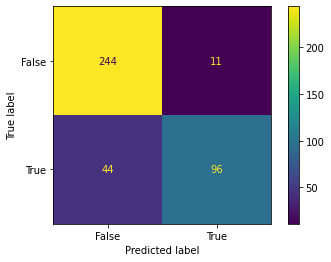

In [ ]:
#draw confusion matrix for report
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)
#y_pred

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       269
           1       0.75      0.83      0.79       126

    accuracy                           0.86       395
   macro avg       0.83      0.85      0.84       395
weighted avg       0.86      0.86      0.86       395



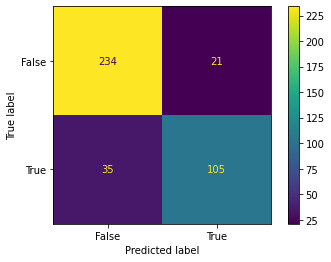

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
#y_pred
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       274
           1       0.67      0.78      0.72       121

    accuracy                           0.82       395
   macro avg       0.78      0.80      0.79       395
weighted avg       0.83      0.82      0.82       395



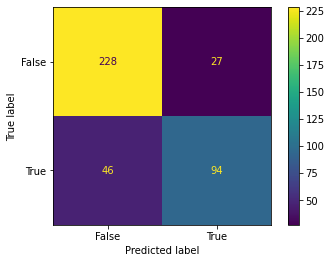

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

RANDOM FOREST CLASSIRFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
#print("Accuracy by random forest classifier is :",100*metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       269
           1       0.74      0.82      0.77       126

    accuracy                           0.85       395
   macro avg       0.82      0.84      0.83       395
weighted avg       0.85      0.85      0.85       395



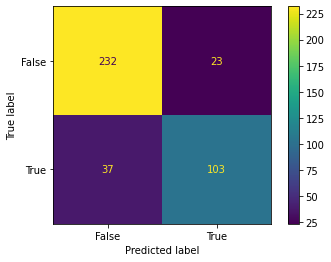

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [ ]:
y_pred = knn.predict(X_test)
#print(confusion_matrix(y_test, y_pred_knn))
#print(classification_report(y_test, y_pred_knn))
#print("Accuracy by k nearest classifier is :",100*metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       275
           1       0.64      0.74      0.68       120

    accuracy                           0.79       395
   macro avg       0.76      0.78      0.76       395
weighted avg       0.80      0.79      0.80       395



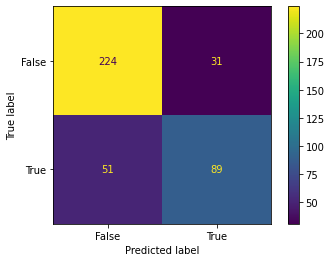

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.85      0.88       279
           1       0.69      0.84      0.76       116

    accuracy                           0.84       395
   macro avg       0.81      0.84      0.82       395
weighted avg       0.86      0.84      0.85       395



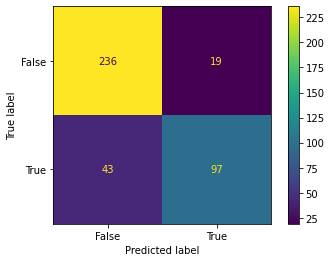

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
def give_vector(cur_text):
  ret = [];
  for i in range(15):
    ret.append(0);
  tok = cur_text.split()
  for i in tok:
    ret[get_catagory(i)]+=1;
  return ret

In [ ]:
def give_vector(cur_text):
  ret = [];
  for i in range(15):
    ret.append(0);
  tok = word_tokenize(cur_text)
  #tok = tk.tokenize(cur_text)
  for i in tok:
    ret[get_catagory(i)]+=1;
  return ret

In [ ]:
cur = [];
cur2 = [];
for i in range(15):
  cur.append(0);
  cur2.append(0);
cur_text1 = 'আমি মরতে চাই এই দুনিয়াতে আর থাকতে চাই না জীবনে কষ্ট ছাড়া কিছু পেলাম না';
cur_text2 = 'পদ্মানদীর মাঝি ১৯৯৩ সালের একটি বাংলা ভাষায় নির্মিত বাংলাদেশ এবং ভারতের যৌথভাবে নির্মিত চলচ্চিত্র। বাঙালি কথা সাহিত্যিক মানিক বন্দ্যোপাধ্যায় রচিত একই নামের উপন্যাস অবলম্বনে গৌতম ঘোষ চলচ্চিত্রটি নির্মাণ করেন। এতে অভিনয় করেন - রাইসুল ইসলাম আসাদ, চম্পা, রূপা গঙ্গোপাধ্যায়, উৎপল দত্ত প্রমূখ'
tokens1 = cur_text1.split()
tokens2 = cur_text2.split()
for i in tokens:
 cur[get_catagory(i)]+=1;
for i in tokens2:
  cur2[get_catagory(i)]+=1;


In [ ]:
test_now = []
test_now.append(cur)
test_now.append(cur2)

In [ ]:
y_pred = lgr.predict(test_now)
y_pred

array([1, 0])